# FFT Preprocessing

In [8]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from src.data import get_data
from src.util import common

from src.features.build_features import make_single_feature, series_to_predict_matrix, make_features

import pickle

p=print

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
SYM='BTC'
LAST_N_HOURS=16000
TARGET='close'
Tx = 72
Ty = 1
TEST_SIZE=0.05

In [3]:
data = pd.read_csv('../data/raw/{}.csv'.format(SYM), index_col=0)

In [18]:
"""
Get percent change feature and target data.
"""
df=data.loc[:,['close']]\
    .pipe(truncate, LAST_N_HOURS)\
    .pipe(calc_target, TARGET)\
    .dropna(how='any', axis=0)

X, y = data_to_supervised(input_df=pd.DataFrame(df['target']), Tx=72, Ty=1)
X

,var1(t-72),var1(t-71),var1(t-70),var1(t-69),var1(t-68),var1(t-67),var1(t-66),var1(t-65),var1(t-64),var1(t-63),...,var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
28075,-0.973867,0.040380,-0.151038,0.131706,0.117207,-0.180808,-0.169408,-0.035244,-0.086183,0.388159,...,-0.156730,0.229030,0.290127,-0.273927,-0.001284,-0.205370,0.227659,0.030799,-0.118026,0.050092
28076,0.040380,-0.151038,0.131706,0.117207,-0.180808,-0.169408,-0.035244,-0.086183,0.388159,0.143207,...,0.229030,0.290127,-0.273927,-0.001284,-0.205370,0.227659,0.030799,-0.118026,0.050092,-0.631611
28077,-0.151038,0.131706,0.117207,-0.180808,-0.169408,-0.035244,-0.086183,0.388159,0.143207,-0.130002,...,0.290127,-0.273927,-0.001284,-0.205370,0.227659,0.030799,-0.118026,0.050092,-0.631611,0.245465
28078,0.131706,0.117207,-0.180808,-0.169408,-0.035244,-0.086183,0.388159,0.143207,-0.130002,-0.117154,...,-0.273927,-0.001284,-0.205370,0.227659,0.030799,-0.118026,0.050092,-0.631611,0.245465,0.021909
28079,0.117207,-0.180808,-0.169408,-0.035244,-0.086183,0.388159,0.143207,-0.130002,-0.117154,0.303654,...,-0.001284,-0.205370,0.227659,0.030799,-0.118026,0.050092,-0.631611,0.245465,0.021909,0.462563
28080,-0.180808,-0.169408,-0.035244,-0.086183,0.388159,0.143207,-0.130002,-0.117154,0.303654,-0.419671,...,-0.205370,0.227659,0.030799,-0.118026,0.050092,-0.631611,0.245465,0.021909,0.462563,-0.008978
28081,-0.169408,-0.035244,-0.086183,0.388159,0.143207,-0.130002,-0.117154,0.303654,-0.419671,0.301401,...,0.227659,0.030799,-0.118026,0.050092,-0.631611,0.245465,0.021909,0.462563,-0.008978,-0.279620
28082,-0.035244,-0.086183,0.388159,0.143207,-0.130002,-0.117154,0.303654,-0.419671,0.301401,-0.003903,...,0.030799,-0.118026,0.050092,-0.631611,0.245465,0.021909,0.462563,-0.008978,-0.279620,0.294553
28083,-0.086183,0.388159,0.143207,-0.130002,-0.117154,0.303654,-0.419671,0.301401,-0.003903,0.114479,...,-0.118026,0.050092,-0.631611,0.245465,0.021909,0.462563,-0.008978,-0.279620,0.294553,-0.178265
28084,0.388159,0.143207,-0.130002,-0.117154,0.303654,-0.419671,0.301401,-0.003903,0.114479,-0.359937,...,0.050092,-0.631611,0.245465,0.021909,0.462563,-0.008978,-0.279620,0.294553,-0.178265,-0.043682


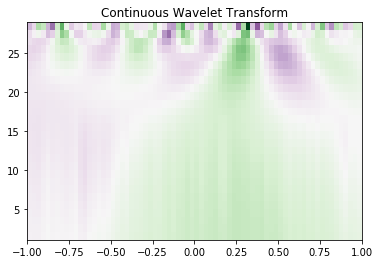

In [5]:
"""
Let's see what the continuous wavelet transform does.
"""

from scipy.fftpack import fft, fftfreq, fftshift
from scipy import signal
N = 28
T = 1.0 / N
START=1000

widths=np.arange(1,N+1)
cwtmatr = signal.cwt(X.iloc[100], wavelet=signal.ricker, widths=widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, N+1], cmap='PRGn', aspect='auto',
            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.title('Continuous Wavelet Transform')
plt.show() 

In [6]:
"""
Apply the CWT to the feature data.
"""
X_cwt = np.apply_along_axis(func1d=signal.cwt, axis=0, arr=X.values, wavelet=signal.ricker, widths=widths)
X_cwt.shape

(28, 15927, 72)

In [7]:
"""
Reshape the data so Tx is the 2nd dimension.
"""
X_cwt_rs=X_cwt.swapaxes(0,1).swapaxes(1,2)
X_cwt_rs.shape

(15927, 72, 28)

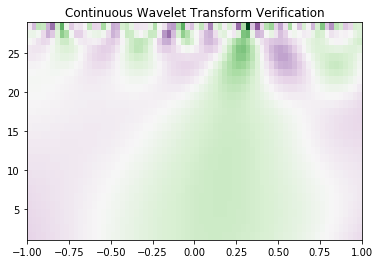

In [8]:
"""
Check to make sure the data is equivalent. Image shoul be the same as the last plot.
"""
cwtmatr = X_cwt_rs[100,:,:].T
plt.imshow(cwtmatr, extent=[-1, 1, 1, N+1], cmap='PRGn', aspect='auto',
            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.title('Continuous Wavelet Transform Verification')
plt.show() 

In [9]:
"""
Train Test Split.
"""
X_train, X_test, y_train, y_test = train_test_split(X_cwt_rs, y, test_size=TEST_SIZE, shuffle=False)

In [10]:
"""
Save data.
"""
np.save(arr=X_train, allow_pickle=True, file='../data/processed/X_train_{}_CWT_72x28'.format(SYM))
np.save(arr=X_test, allow_pickle=True, file='../data/processed/X_test_{}_CWT_72x28'.format(SYM))
np.save(arr=y_train, allow_pickle=True, file='../data/processed/y_train_{}_CWT_72x28'.format(SYM))
np.save(arr=y_test, allow_pickle=True, file='../data/processed/y_test_{}_CWT_72x28'.format(SYM))